In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
books=pd.read_csv('/content/drive/MyDrive/books_dataset/Books.csv')

<ipython-input-3-121dfdab0735>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books=pd.read_csv('/content/drive/MyDrive/books_dataset/Books.csv')


In [ ]:
print(books.shape)

(271360, 8)


In [ ]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher']]

In [ ]:
# Remane some wierd columns name
books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher" },inplace=True)

In [ ]:
books.head()

,ISBN,title,author,year,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ISBN       271360 non-null  object
 1   title      271360 non-null  object
 2   author     271358 non-null  object
 3   year       271360 non-null  object
 4   publisher  271358 non-null  object
dtypes: object(5)
memory usage: 10.4+ MB


In [ ]:
users=pd.read_csv('/content/drive/MyDrive/books_dataset/Users.csv')

In [ ]:
# Remaning some wierd columns name
users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [ ]:
users.head()

,user_id,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
ratings=pd.read_csv('/content/drive/MyDrive/books_dataset/Ratings.csv')

In [ ]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings.shape

(1149780, 3)

In [ ]:
# Lets remane some wierd columns name
ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

In [ ]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
ratings['user_id'].unique().shape

(105283,)

In [ ]:
# storing users who had at least rated more than 200 books
x = ratings['user_id'].value_counts() > 200

In [ ]:
x[x].shape

(899,)

In [ ]:
x[x].shape

(899,)

In [ ]:
y=x[x].index

In [ ]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
        88793,  44296, 268622, 155916,  73681, 274808,  28634, 188951,  59727,
         9856],
      dtype='int64', name='user_id', length=899)

In [ ]:
ratings = ratings[ratings['user_id'].isin(y)]

In [ ]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [ ]:
ratings.shape

(526356, 3)

In [ ]:
rating_books=ratings.merge(books,on='ISBN')

In [ ]:
# Now join ratings with books

ratings_with_books = ratings.merge(books, on='ISBN')

In [ ]:
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc


In [ ]:
ratings_with_books.shape

(487671, 7)

In [ ]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [ ]:
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [ ]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [ ]:
number_rating.head()  # no of users rated that book

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [ ]:
final_ratings=ratings_with_books.merge(number_rating,on='title')

In [ ]:
final_ratings.head()


,user_id,ISBN,rating,title,author,year,publisher,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,82


In [ ]:
final_ratings.shape

(487671, 8)

In [ ]:
final_ratings=final_ratings[final_ratings['num_of_rating']>=50]

In [ ]:
final_ratings.shape

(61853, 8)

In [ ]:
# lets drop the duplicates
final_ratings.drop_duplicates(['user_id','title'],inplace=True)

In [ ]:
final_ratings.shape

(59850, 8)

In [ ]:
# Lets create a pivot table
book_pivot = final_ratings.pivot_table(index='user_id', columns='title', values= 'rating')

In [ ]:
book_pivot

title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Cry In The Night,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
user_id,,,,,,,,,,,,,,,,,,,,,
254,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2766,NaN,NaN,NaN,NaN,NaN,7.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2977,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,0.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0.0,NaN,NaN
277427,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277478,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
book_pivot.fillna(0,inplace=True)

In [ ]:
book_pivot

title,1984,1st to Die: A Novel,2nd Chance,4 Blondes,84 Charing Cross Road,A Bend in the Road,A Case of Need,"A Child Called \It\"": One Child's Courage to Survive""",A Civil Action,A Cry In The Night,...,Winter Solstice,Wish You Well,Without Remorse,"Wizard and Glass (The Dark Tower, Book 4)",Wuthering Heights,Year of Wonders,You Belong To Me,Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,Zoya,"\O\"" Is for Outlaw"""
user_id,,,,,,,,,,,,,,,,,,,,,
254,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2766,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2977,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0
3363,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275970,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
277478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
# Convert DataFrame to NumPy array
book_ratings = book_pivot.values
print(book_ratings)

[[ 9.  0.  0. ...  0.  0.  0.]
 [ 0.  0. 10. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [ ]:
# Lets create a pivot table
book_pivot1 = final_ratings.pivot_table(index='title', columns='user_id', values= 'rating')

In [ ]:
book_pivot1

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [ ]:
book_pivot1.fillna(0,inplace=True)

In [ ]:
book_pivot1

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
# Convert DataFrame to NumPy array
book_pivot1_ratings = book_pivot1.values
print(book_pivot1_ratings)

[[ 9.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0. 10.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


In [ ]:
rank = np.linalg.matrix_rank(book_pivot1_ratings)
rank

742

In [ ]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(book_pivot1_ratings,k=20)

In [ ]:
sigma

array([ 82.04774361,  82.26682525,  84.29503781,  84.67225222,
        85.67992247,  86.50351207,  88.53747755,  89.15716184,
        92.15376502,  93.31932075,  94.63168958,  99.36323482,
       101.92804379, 105.26049343, 115.33639637, 120.49118682,
       129.64363673, 134.96930562, 147.79974379, 273.76260069])

In [ ]:
predicted_ratings = np.dot(np.dot(U, np.diag(sigma)), Vt)

In [ ]:
book_pivot1_ratings.shape

(742, 888)

In [ ]:
predicted_ratings

array([[ 0.91191366,  0.27753016,  0.40922307, ...,  0.        ,
         0.12585811, -0.03519424],
       [-0.41015941,  0.35146378, -0.21930875, ...,  0.        ,
         0.35605147,  0.08171764],
       [ 0.22752579,  0.97488725, -0.30854882, ...,  0.        ,
         0.45826136,  0.16369465],
       ...,
       [ 0.56878809,  0.10304754,  0.33472876, ...,  0.        ,
        -0.03078357,  0.25400795],
       [-0.13871634, -0.14901313, -0.03467584, ...,  0.        ,
         0.1077893 ,  0.02803392],
       [ 0.15549172,  0.13141616,  0.36333224, ...,  0.        ,
         0.00254188, -0.0205218 ]])

In [ ]:
m=1
arr=np.array([])

In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
rmse_list=[]
m=1
for i in range(100):
  U, sigma, Vt = svds(book_pivot1_ratings,k=m)
  predicted_ratings = np.dot(np.dot(U, np.diag(sigma)), Vt)
  actual_ratings = book_pivot1_ratings.flatten()
  predicted_ratings1 = predicted_ratings.flatten()
  # Compute RMSE
  rmse = math.sqrt(mean_squared_error(actual_ratings, predicted_ratings1))
  rmse_list.append(rmse)
  arr = np.append(arr, [rmse])
  print(f"RMSE: for k = {m}\n {rmse}")
  m+=1

RMSE: for k = 1
 1.1792513663750408
RMSE: for k = 2
 1.1651095229707005
RMSE: for k = 3
 1.1531837984810676
RMSE: for k = 4
 1.1420701978255727
RMSE: for k = 5
 1.132382585127211
RMSE: for k = 6
 1.1234328057526026
RMSE: for k = 7
 1.1159236571048228
RMSE: for k = 8
 1.1088362503518452
RMSE: for k = 9
 1.1020587984322696
RMSE: for k = 10
 1.0958751944031293
RMSE: for k = 11
 1.0898282631985823
RMSE: for k = 12
 1.0838989518883524
RMSE: for k = 13
 1.078319442131155
RMSE: for k = 14
 1.0727888051543377
RMSE: for k = 15
 1.0674826278864071
RMSE: for k = 16
 1.062251252088676
RMSE: for k = 17
 1.057117216392849
RMSE: for k = 18
 1.0520041010794328
RMSE: for k = 19
 1.0471108626250167
RMSE: for k = 20
 1.0422208608747359
RMSE: for k = 21
 1.0373837953527574
RMSE: for k = 22
 1.0326102325516109
RMSE: for k = 23
 1.0279825393181978
RMSE: for k = 24
 1.0233744247283545
RMSE: for k = 25
 1.018809476808657
RMSE: for k = 26
 1.0143644810692773
RMSE: for k = 27
 1.0099628998714125
RMSE: for k = 2

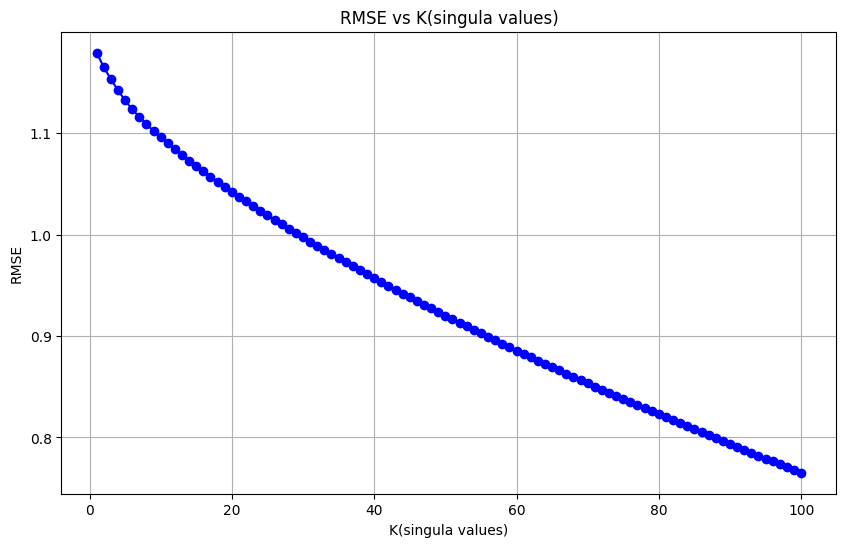

In [ ]:
epochs = np.arange(1, 101)  # Example: epochs from 1 to 10
# rmse_values = [5.0, 4.8, 4.5, 4.3, 4.0, 3.9, 3.7, 3.6, 3.5, 3.4]  # Example RMSE values

# Plotting RMSE vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, rmse_list, marker='o', linestyle='-', color='b')
plt.title('RMSE vs K(singula values)')
plt.xlabel('K(singula values)')
plt.ylabel('RMSE')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [ ]:
model1=model.fit(book_pivot1_ratings)

In [ ]:
distances , suggestions = model1.kneighbors(book_pivot1.iloc[237,:].values.reshape(1,-1),n_neighbors=20)

In [ ]:
for i in range(len(suggestions)):
    print(book_pivot1.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall', 'Jacob Have I Loved', 'The Witness',
       'Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback))', 'Toxin',
       'The Long Road Home', 'Long After Midnight', 'Truly, Madly Manhattan',
       'Secrets', 'Bittersweet', 'The Fourth Hand',
       'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))',
       'The Reef', 'Weep No More My Lady', 'Second Nature'],
      dtype='object', name='title')


In [ ]:
model2=model.fit(predicted_ratings)

In [ ]:
distances , suggestions = model2.kneighbors(book_pivot1.iloc[237,:].values.reshape(1,-1),n_neighbors=20)

In [ ]:
for i in range(len(suggestions)):
    print(book_pivot1.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)',
       'Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))',
       'Charlotte's Web (Trophy Newbery)', 'The Witness', 'Toxin', 'Matilda',
       'The Andromeda Strain', 'Bittersweet', 'Prodigal Summer: A Novel',
       'Bridge to Terabithia', 'Seven Habits Of Highly Effective People',
       'A Year in Provence', 'Here on Earth', 'The Fourth Hand', 'The Promise',
       'How Stella Got Her Groove Back', 'Second Nature'],
      dtype='object', name='title')


In [ ]:
model1=model.fit(book_pivot1_ratings)

In [ ]:
distances , suggestions = model1.kneighbors(book_pivot1.iloc[14,:].values.reshape(1,-1),n_neighbors=20)

In [ ]:
for i in range(len(suggestions)):
    print(book_pivot1.index[suggestions[i]])

Index(['A Heartbreaking Work of Staggering Genius', 'No Safe Place',
       'A Civil Action', 'Long After Midnight', 'Exclusive',
       'A Day Late and a Dollar Short', 'Lake Wobegon days', '4 Blondes',
       'Pleading Guilty', 'CAT'S EYE', 'Sleepers', 'Abduction',
       'Jacob Have I Loved', 'Journey', 'Deck the Halls (Holiday Classics)',
       'Table For Two', 'Last Man Standing', 'The Terminal Man',
       'The Most Wanted', 'The Cradle Will Fall'],
      dtype='object', name='title')


In [ ]:
model2=model.fit(predicted_ratings)

In [ ]:
distances , suggestions = model2.kneighbors(book_pivot1.iloc[104,:].values.reshape(1,-1),n_neighbors=20)

In [ ]:
for i in range(len(suggestions)):
    print(book_pivot1.index[suggestions[i]])

Index(['Cat &amp; Mouse (Alex Cross Novels)', 'Homecoming', 'Eyes of a Child',
       'Nothing Lasts Forever', 'Exclusive', 'Dust to Dust', 'Unspeakable',
       'The Cradle Will Fall', 'The Clinic (Alex Delaware Novels (Paperback))',
       'Mother of Pearl', 'Hide &amp; Seek', 'The Ghost', 'The Sands of Time',
       'Fat Tuesday',
       'Tom Clancy's Op-Center (Tom Clancy's Op Center (Paperback))',
       'Jacob Have I Loved', 'Last Chance Saloon', 'Silent Witness',
       'A Patchwork Planet', 'Foucault's Pendulum'],
      dtype='object', name='title')


In [ ]:
def recommend_book(book_name):
    book_id = np.where(book_pivot1.index == book_name)[0][0]
    model1=model.fit(book_pivot1_ratings)
    distances , suggestions = model1.kneighbors(book_pivot1.iloc[book_id,:].values.reshape(1,-1),n_neighbors=10)

    for i in range(len(suggestions)):
        if i==0:
            print('The suggestion for',book_name,'are :')
        if not 0:
            print(book_pivot1.index[suggestions[i]])

In [ ]:
recommend_book('Exclusive')

The suggestion for Exclusive are :
Index(['Exclusive', 'The Cradle Will Fall', 'The Long Road Home',
       'Jacob Have I Loved', 'No Safe Place', 'Eyes of a Child',
       'Deck the Halls (Holiday Classics)', 'Long After Midnight',
       'Fine Things', 'Unspeakable'],
      dtype='object', name='title')


In [ ]:
def recommend_book_svd(book_name):
    book_id = np.where(book_pivot1.index == book_name)[0][0]
    model2=model.fit(predicted_ratings)
    distances , suggestions = model2.kneighbors(book_pivot1.iloc[book_id,:].values.reshape(1,-1),n_neighbors=10)

    for i in range(len(suggestions)):
        if i==0:
            print('The suggestion for',book_name,'are :')
        if not 0:
            print(book_pivot1.index[suggestions[i]])

In [ ]:
recommend_book_svd("Everything's Eventual : 14 Dark Tales")

The suggestion for Everything's Eventual : 14 Dark Tales are :
Index(['Everything's Eventual : 14 Dark Tales', 'The Regulators',
       'Nightmares &amp; Dreamscapes', 'The Dead Zone', 'Different Seasons',
       'Sleepers', 'Dolores Claiborne', 'Desperation',
       'Wizard and Glass (The Dark Tower, Book 4)',
       'From the Corner of His Eye'],
      dtype='object', name='title')
